In [1]:
%env KIF_DEBUG=
%env KIF_RESOLVE_ENTITIES=1

env: KIF_DEBUG=
env: KIF_RESOLVE_ENTITIES=1


In [2]:
import show

# RDFox

In [3]:
from kif_lib import *
from kif_lib.vocabulary import wd

The `sparql-rdfox` store can be used to load local RDF files using RDFox:

In [4]:
kb = Store('sparql-rdfox', '../tests/data/benzene.ttl')

         information including role passwords or authorization tokens. See the endpoint.channel variable and related
         variables in the description of the RDFox endpoint for details of how to set up TLS.



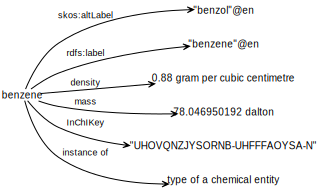

In [5]:
Graph(*kb.filter(subject=wd.benzene)).to_graphviz()

## Rules

Rule files can be loaded into `sparql-rdfox`:

In [6]:
kb = Store('sparql-rdfox', '../tests/data/benzene.ttl', '../tests/data/dalton.dlog')

For example, the `../tests/data/dalton.dlog` ruleset converts [mass](http://www.wikidata.org/entity/P2067) statements expressed in [dalton](http://www.wikidata.org/entity/Q483261) to [kilogram per mole](http://www.wikidata.org/entity/Q28924753):

In [7]:
with open('../tests/data/dalton.dlog') as fp:
    print(''.join(filter(lambda l: not l.startswith('@'), fp)))


# from dalton to kb/mol (best-ranked only)
[?x, wdt:P2067, ?kg_per_mole],
[?x, p:P2067, ?wds1],
[?wds1, wikibase:rank, ?rank],
[?wds1, rdf:type, wikibase:BestRank],
[?wds1, ps:P2067, ?kg_per_mole],
[?wds1, psv:P2067, ?wdv1],
[?wdv1, rdf:type, wikibase:QuantityValue],
[?wdv1, wikibase:quantityAmount, ?kg_per_mole],
[?wdv1, wikibase:quantityUnit, wd:Q28924753] :-
  [?x, wdt:P2067, ?dalton],
  [?x, p:P2067, ?wds],
  [?wds, rdf:type, wikibase:BestRank],
  [?wds, wikibase:rank, ?rank],
  [?wds, ps:P2067, ?dalton],
  [?wds, psv:P2067, ?wdv],
  [?wdv, rdf:type, wikibase:QuantityValue],
  [?wdv, wikibase:quantityAmount, ?dalton],
  [?wdv, wikibase:quantityUnit, wd:Q483261],
  BIND((0.001 * ?dalton) AS ?kg_per_mole),
  SKOLEM(?wds, ?wds1),
  SKOLEM(?wdv, ?wdv1).



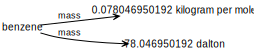

In [8]:
Graph(*kb.filter(property=wd.mass)).to_graphviz()

The same thing, now for 10 statements:

In [9]:
G = Store('wdqs').filter(wd.instance_of(wd.type_of_a_chemical_entity), wd.mass, limit=10)
kb = Store('sparql-rdfox', '../tests/data/dalton.dlog', graph=G)
display(*kb.filter())

(**Statement** (**Item** [3',4-Dihydroxy-3,5'-dimethoxybibenzyl](http://www.wikidata.org/entity/Q103815914)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 0.274120509056 (**Item** [kilogram per mole](http://www.wikidata.org/entity/Q28924753)))))

(**Statement** (**Item** [3',4-Dihydroxy-3,5'-dimethoxybibenzyl](http://www.wikidata.org/entity/Q103815914)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 274.120509056 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

(**Statement** (**Item** [3,4-dimethoxy-9,10-dihydrophenanthrene-2,7-diol](http://www.wikidata.org/entity/Q103815911)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 0.272104858992 (**Item** [kilogram per mole](http://www.wikidata.org/entity/Q28924753)))))

(**Statement** (**Item** [3,4-dimethoxy-9,10-dihydrophenanthrene-2,7-diol](http://www.wikidata.org/entity/Q103815911)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 272.104858992 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

(**Statement** (**Item** [3,4'-Dihydroxy-3',4,5-trimethoxybibenzyl](http://www.wikidata.org/entity/Q103815907)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 0.30413107374 (**Item** [kilogram per mole](http://www.wikidata.org/entity/Q28924753)))))

(**Statement** (**Item** [3,4'-Dihydroxy-3',4,5-trimethoxybibenzyl](http://www.wikidata.org/entity/Q103815907)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 304.13107374 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

(**Statement** (**Item** [2-hydroxy-3-methyl-5-(methylamino)cyclohexa-2,5-diene-1,4-dione](http://www.wikidata.org/entity/Q103813502)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 0.167058243148 (**Item** [kilogram per mole](http://www.wikidata.org/entity/Q28924753)))))

(**Statement** (**Item** [2-hydroxy-3-methyl-5-(methylamino)cyclohexa-2,5-diene-1,4-dione](http://www.wikidata.org/entity/Q103813502)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 167.058243148 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

(**Statement** (**Item** [(4aR,5S)-8-hydroxy-3,4a,5-trimethyl-4H,5H,6H-naphtho[2,3-b]furan-2,7-dione](http://www.wikidata.org/entity/Q103813501)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 0.260104858992 (**Item** [kilogram per mole](http://www.wikidata.org/entity/Q28924753)))))

(**Statement** (**Item** [(4aR,5S)-8-hydroxy-3,4a,5-trimethyl-4H,5H,6H-naphtho[2,3-b]furan-2,7-dione](http://www.wikidata.org/entity/Q103813501)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 260.104858992 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

(**Statement** (**Item** [Quinolonimide](http://www.wikidata.org/entity/Q103813490)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 0.228053492116 (**Item** [kilogram per mole](http://www.wikidata.org/entity/Q28924753)))))

(**Statement** (**Item** [Quinolonimide](http://www.wikidata.org/entity/Q103813490)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 228.053492116 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

(**Statement** (**Item** [(4E,7E,10E)-dodeca-1,4,7,10-tetraene](http://www.wikidata.org/entity/Q10381006)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 0.162140850576 (**Item** [kilogram per mole](http://www.wikidata.org/entity/Q28924753)))))

(**Statement** (**Item** [(4E,7E,10E)-dodeca-1,4,7,10-tetraene](http://www.wikidata.org/entity/Q10381006)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 162.140850576 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

(**Statement** (**Item** [(1S,2S,4S,5S,6R,10S)-2-(hydroxymethyl)-10-{[(2R,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy}-3,9-dioxatricyclo[4.4.0.0²,⁴]dec-7-en-5-yl (2E,6E)-8-hydroxy-2,6-dimethylocta-2,6-dienoate](http://www.wikidata.org/entity/Q103786683)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 0.5282206765919999 (**Item** [kilogram per mole](http://www.wikidata.org/entity/Q28924753)))))

(**Statement** (**Item** [(1S,2S,4S,5S,6R,10S)-2-(hydroxymethyl)-10-{[(2R,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy}-3,9-dioxatricyclo[4.4.0.0²,⁴]dec-7-en-5-yl (2E,6E)-8-hydroxy-2,6-dimethylocta-2,6-dienoate](http://www.wikidata.org/entity/Q103786683)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 528.2206765919999 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

(**Statement** (**Item** [(3R,8R,9R,10S,13R,14R,17S)-17-[(2R,5R)-5-ethyl-6-methylheptan-2-yl]-10,13-dimethyl-2,3,4,7,8,9,11,12,14,15,16,17-dodecahydro-1H-cyclopenta[a]phenanthren-3-ol](http://www.wikidata.org/entity/Q103786546)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 0.41438616622 (**Item** [kilogram per mole](http://www.wikidata.org/entity/Q28924753)))))

(**Statement** (**Item** [(3R,8R,9R,10S,13R,14R,17S)-17-[(2R,5R)-5-ethyl-6-methylheptan-2-yl]-10,13-dimethyl-2,3,4,7,8,9,11,12,14,15,16,17-dodecahydro-1H-cyclopenta[a]phenanthren-3-ol](http://www.wikidata.org/entity/Q103786546)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 414.38616622 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

(**Statement** (**Item** [ammonium hexafluoroaluminate](http://www.wikidata.org/entity/Q1014242)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 0.195075 (**Item** [kilogram per mole](http://www.wikidata.org/entity/Q28924753)))))

(**Statement** (**Item** [ammonium hexafluoroaluminate](http://www.wikidata.org/entity/Q1014242)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 195.075 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

## Transitive closure

We can use rules to compute the transitive closure of relations.

The following TTL contains [has part](http://www.wikidata.org/entity/P527) statements obtained from Wikidata.

In [10]:
kb = Store('sparql-rdfox', '../tests/data/has_part.ttl')

Without loading any rules, this is the graph we get:

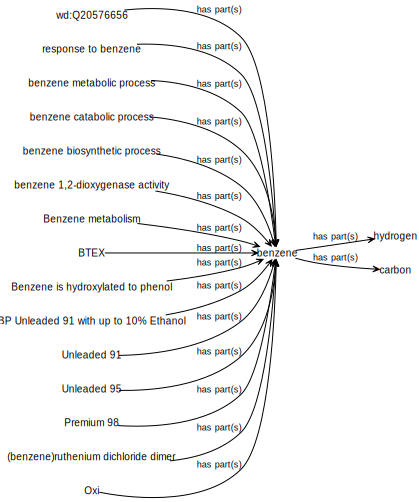

In [11]:
Graph(*kb.filter(property=wd.has_part)).to_graphviz()

Let us know load the same graph together with rules that compute the transitive closure of [has part](http://www.wikidata.org/entity/P527):

In [12]:
kb = Store('sparql-rdfox', '../tests/data/has_part.ttl', '../tests/data/has_part.dlog')

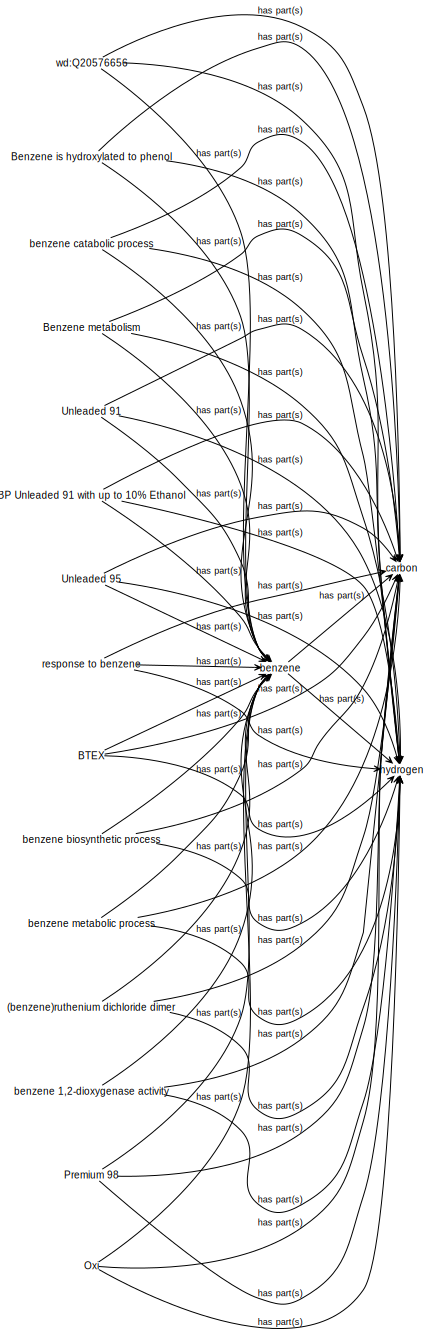

In [13]:
Graph(*kb.filter(property=wd.has_part)).to_graphviz()